# About SciKit

## What is it
It's a (supervised/unsupervised) machine learning/statistical modelling library/toolset for Python. It ships with some ready-implemented classification, clustering, regression algorithms.
Its implementation is extensively supported by NumPy for efficent algebra and array operations and Pandas. It also integrates well with NumPy, Matplotlib, Pandas and other Python libraries.

It also provides a way to load sample data-sets for quick prototyping/experimentation [3]

## Who is it used by
Major technological players that you might have heard of are using SciKit-Learn for various purposes, some of those include:

* Spotify, for their music recommendation to users.
* Evernote, for building their classifiers, training the models and evaluating their results.
* Lovely, for understanding user behaviour (modelling their analytics data), detecting and stopping fraud.

It's being used by many companies as a "plug and play" library for their data modelling/machine learning needs, it integrates well with mature codebases and saves developers the pain of implementing those algorithms by hand, whilst providing a clean and well performant solution.

## What will be covered by this Jupyter book
In this Jupyter notebooks we'll go over three algorithms that SciKit-learn implement for our convenience - We'll briefly explain their possible usages, how the algorithm itself looks and we'll showcase the usage of those algorithms on sample data. Those algorithms are:

* Mean Shift, an algorithm used to detect blobs/clusters of data - Used in computer vision and image processing/classification.
* K-Means, an unsupervised learning algorithm that clusters data sets into a number of blobs/clusters - Used in (but not limited to) statistics, astronomy and search engines [1] [2]

## References
[1] https://www.techopedia.com/definition/32057/k-means-clustering

[2] https://en.wikipedia.org/wiki/K-means_clustering

[3] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


# Mean Shift Algorithm
## What is it

The MeanShift algorithm is used to detect "blob clusters" from a dataset. It's useful to detect any sample clusters and trends that happen in the dataset given to it.

The usages vary from pattern recognition to computer vision tasks [1]

## References
[1] https://www.sciencedirect.com/science/article/abs/pii/S0020019012002827

In [1]:
import numpy as nump
import matplotlib.pyplot as plt
from itertools import cycle

# Import necessary implementations
from sklearn.cluster import MeanShift, estimate_bandwidth

# We'll use this to generate our sample data, later, we'll use a real-world data-set
from sklearn.datasets import make_blobs

## Sample Data Set-up

In [2]:
# Where our sample data will generate those centers around - The algorithm should find 4 blobs in this case.
blob_centers = [[1, 1], [1, -1], [-1, 1], [-1,-1]]
X, _ = make_blobs(n_samples=20000, centers=blob_centers, cluster_std=0.6)

## Usage of Mean Shift with Sample Data

In [3]:
# Sets the estimated region to search through - Can be set manually, but in our case we're going to estimate it.
est_band = estimate_bandwidth(X, quantile=0.2, n_samples=1500)

result_ms = MeanShift(bandwidth=est_band, bin_seeding=True)
result_ms.fit(X)

labels = result_ms.labels_
unique = nump.unique(labels)
## Get the centers
centers = result_ms.cluster_centers_

# How many centers have we detected?
centers_amt = len(centers)

print("Detected clusters: %d" % centers_amt )

Detected clusters: 4


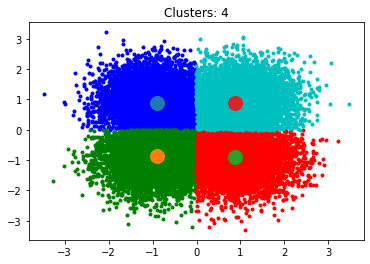

In [4]:
# begins a new figure
plt.figure(1)
# clear it
plt.clf()

# this will keep cycling colors, we'll use this to associate a color to the center
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

# k, being the index number of the centre, col, being the color associated (through zip) with the centre index
for k, col in zip(range(centers_amt), colors):
    members = labels == k
    cluster_center = centers[k]
    
    # Plot the sample points, the cluster dots.
    plt.plot(X[members, 0], X[members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markersize=14
    )
    plt.title("Clusters: %d" % centers_amt)
plt.show()
             

## Usage of Mean Shift with real-world data

With this dataset we'll locate the clusters of Accommodations that have been quality approved in Ireland. We'll be able to see in which cities/parts of the country, there are the most B&Bs.
Whenever they are one-offs, or do the B&B locations tend to cluster together.

In [5]:
import pandas as pd

dataset = pd.read_csv("./data_1.csv")
dataset.head() # Take a look at the sample data.

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Bramble Rock,http://www.bramblerock.com,+353(0)40445075,-6.291733,53.009756,Wicklow,Glendalough,Republic of Ireland,B&B
1,The Davenport,http://www.instagram.com/thedavenportdublin/,+353(0)16073500,-6.250031,53.341665,Dublin,Dublin City,Republic of Ireland,"Hotel,Covid Safety Charter"
2,Townsend House,http://www.townsendhouse-guesthouse.com,+353(0)579121276,-7.909500,53.098816,Offaly,Birr,Republic of Ireland,"Guesthouse,Covid Safety Charter"
3,River's Edge,http://www.riversedge.ie,353670000000,-9.783882,52.106485,Kerry,Killorglin,Ireland,"B&B,B&B Ireland"
4,Amber Springs Hotel & Health Spa,https://www.ambersprings.ie/,+353(0)539484000,-6.290339,52.668124,Wexford,Gorey,Republic of Ireland,"Hotel,Covid Safety Charter,Stay and Spend"


In [6]:
# We're not interested in anything else, so let's just limit out data to Longitude and Latitude 
dataset = dataset[["Longitude", "Latitude"]]

#Let's get the bounding box (minimum x, y position and maximum x, y position)
BoundingBox = ((dataset.Longitude.min(), dataset.Longitude.max(), dataset.Latitude.min(), dataset.Latitude.max()))
BoundingBox

(-10.5145311896667, -5.998079892, 51.435022754966, 55.361922)

<AxesSubplot:title={'center':'Accomodation in Ireland'}>

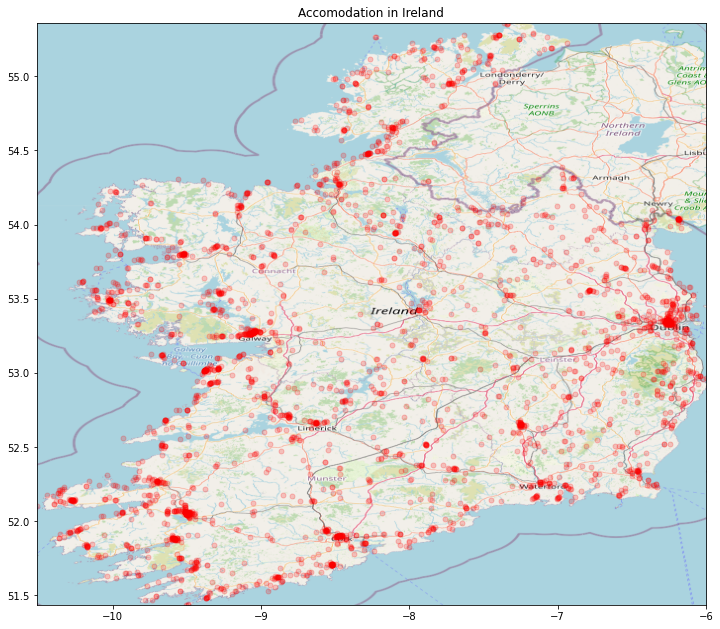

In [7]:
MapImage = plt.imread("./ireland.png")

# Let's create a subplot
figure, axes = plt.subplots(figsize= (12,12))

axes.clear()
axes.scatter(dataset.Longitude, dataset.Latitude, zorder=1, alpha=0.2, c="r", s=25)

axes.set_title("Accomodation in Ireland")
# Set the axis view limits based on the bounding box, data is fit based on that bounding box
axes.set_xlim(BoundingBox[0], BoundingBox[1])
axes.set_ylim(BoundingBox[2], BoundingBox[3])
axes.imshow(MapImage, zorder=0, extent = BoundingBox, aspect = "equal")
axes

In [8]:
result = MeanShift(bandwidth=0.4, bin_seeding=True, cluster_all=False)
result.fit(dataset)

labels = result.labels_
unique = nump.unique(labels)
centers = result.cluster_centers_

amt_centers = len(centers)

print("Detected centers: %d" % amt_centers)

Detected centers: 17


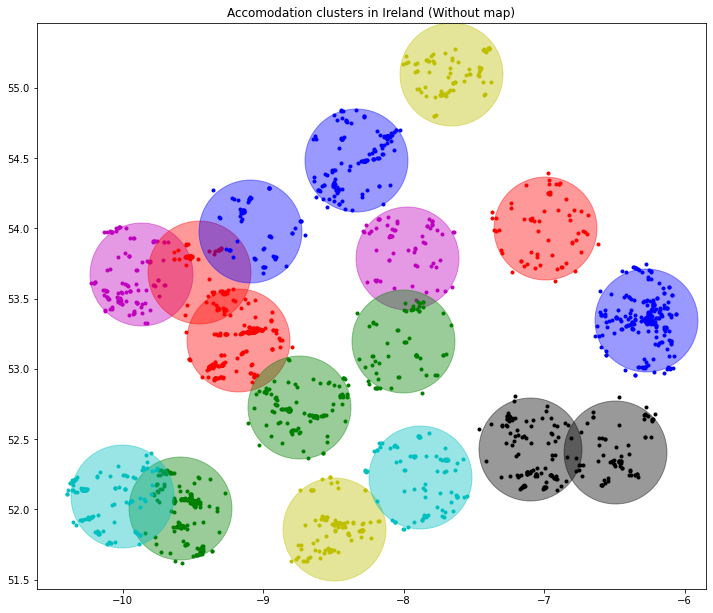

In [9]:
axes.clear()

#This will keep repeating colors
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for center, col in zip(range(amt_centers), colors):
    # Get the cluster center
    cluster_center = centers[center]
    members = labels == center
    
    axes.plot(dataset[members].Longitude, dataset[members].Latitude, col + ".")
    
    axes.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        alpha=0.4,
        markersize=1750/amt_centers,
        color = col
    )

axes.set_title("Accomodation clusters in Ireland (Without map)")
figure


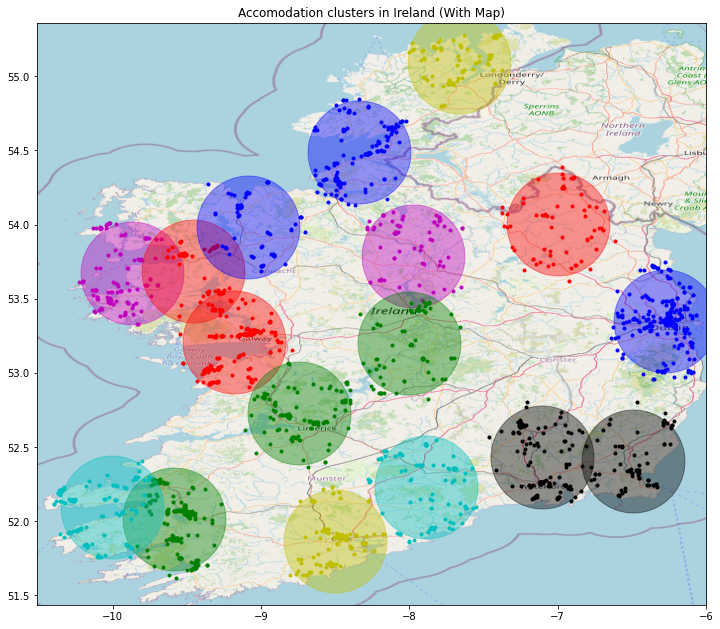

In [10]:
axes.imshow(MapImage, zorder=0, extent = BoundingBox, aspect = "equal")
axes.set_title("Accomodation clusters in Ireland (With Map)")
figure


## Remarks:
There are a lot parameters to play around with the SciKit's implementation of Mean Shift - For example, by default, the algorithm tries to cluster ALL points in the dataset to a nearby cluster. By setting "cluster_all" to false, we can allow the algorithm to "orphan" the data points which do not pass a minimum distance requirement to a nearby cluster.

## Inner works of the Mean Shift algorithm
The Mean Shift algorithm is a centroid-based clustering algorithm (each cluster is represented by a central vector, objects are assigned to the clusters based on proximity)

It iterates over each candidate for a centroid to be the mean of the points within a region. Those candidates are filtered out to eliminate near-duplicates, which forms the final set of centroids.

x, being the candidate, and t being the iteration - the candidate is updated using this equation:
$x_i^{t+1} = m(x_i^t)$

$N(x_i)$ being the neighbourhood of samples within a distance around $x_i$ centroid, m is the mean shift vector that's computed for each centroid that points towards a region of the highest difference (increase) in the density of the points. It is calculated using the following equation - Which basically, updates a centroid to be the mean of the samples within the neighborhood of the samples around itself.

\begin{equation}
m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}
\end{equation}

# K-Means
## What is it
This algorithm clusters data by trying to seperate data in N amount of groups of equal variance, minimalizing it to a criterion known as 'inertia'.
It can be used to identify groups of data in data sets.

This algorithm requires number of the clusters to be specified, and it scales well with a large number of samples. It has many uses across a large range of application areas.

The algorithm divides a set (N) of samples (X) into (K) disjoint clusters (C), each described as the mean $\mu_j$ of the samples in the cluster, also called the cluster centroids.
\begin{equation}
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)
\end{equation}

In a big nutshell and simplification - The algorithm has three steps.
First, the initial centroids are chosen - After that, K-Means loops between the next two steps back and forth.
The first step, loops over each sample to assign it to the nearest centroid created in step one - The second step creates new centroids by taking the mean value of all samples assigned to a centroid in the previous step, the difference betwen old and new centroids are then taken and computed - The algorithm stops once it reaches a certain threshold - In a nut shell, it repeats until all the centroids do not move significantly.

# Usage of K-Means
You can use the K-Means algorithm and its deriatives to group, recognise groups and patterns through unsupervised learning. The data you provide does not have to be labeled, it finds patterns and trends itself.

## Example use-cases
* Seperate audio tracks
* Flatten out colors in images

## Example: Reducing the amount of colors needed to represent the image.

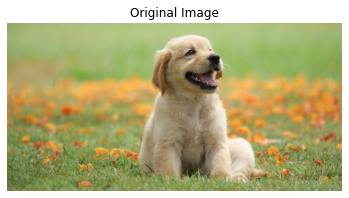

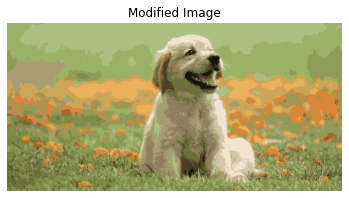

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import image
from sklearn.utils import shuffle

# How many clusters are there going to be?
amt_colors = 16

# Load the image of dog
dog = image.imread('./dog.jpg')
# Convert the image into an array of bits
dog = np.array(dog, dtype=np.float64)

w, h, d = original_shape = tuple(dog.shape)

dog_array = np.reshape(dog, (w * h, d))

sample_array = shuffle(dog_array, random_state=0, n_samples = 1000)
kmeans_result = KMeans(n_clusters=amt_colors, random_state=0).fit(sample_array)

# Extract labels
kmeans_labels = kmeans_result.predict(dog_array)

# Display original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title("Original Image")
plt.imshow(dog.astype(np.uint8))

# Display modified image
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title("Modified Image")
plt.imshow(kmeans_result.cluster_centers_[kmeans_labels].reshape(w, h, -1).astype(np.uint8))

# Linear Regression
## What is it
It is a supervised machine learning (relies on labelled input data) algorithm used for regression. The algorithm tries to predict a variable in the given context (variables) - it finds out a linear relationship between variables and based on that makes a prediction.

## Example
In this example we'll first plot our existing data about the Amazon stock prices throughout the years, and then perform regression testing to forecast the future stock price.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for our plotting purposes
import pandas as pd # Import pandas, we'll handily load our CSV using pandas, as well as manipulate our data
from sklearn import neighbors # Import the algorithm


#Load our dataset
stock = pd.read_csv("./amazon.csv", header=0)

# Take a peek at the data
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


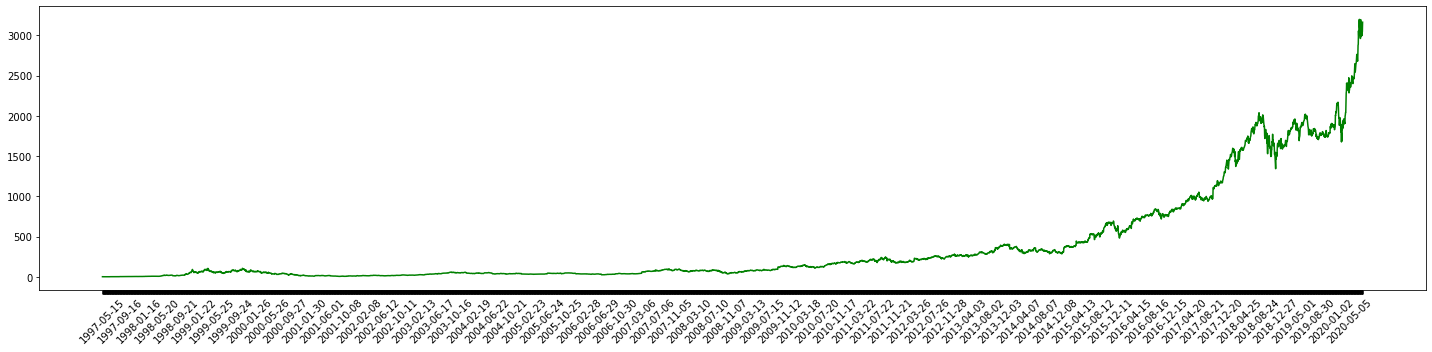

In [19]:
plt.rcParams['figure.figsize'] = [20, 5]

fig, ax = plt.subplots()
plt.plot_date(stock['Date'], stock['Close'], "g")
# Rotate the labels, they're easier to read then, and they fit in nicely 
plt.xticks(rotation=45)
plt.tight_layout()

# Only show every 85th label, there's a lot of them.
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 85 != 0:
        label.set_visible(False)

plt.show()

In [30]:
# Import LabelEncoder
from sklearn import preprocessing

#Create our labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
year_encoded=le.fit_transform(stock["Date"])

close_encoded=le.fit_transform(stock["Close"])
label=le.fit_transform(play)

print(year_encoded)
print(temp_encoded)

features = zip(year_encoded, close_encoded)

# --TODO

[   0    1    2 ... 5839 5840 5841]
[  22   20   19 ... 5219 5220 5228]
